# Use Artificial Neural Network model to predict probability of diabetes. 
## To compare the effectiveness of different AI models, I run the same dataset by SVM, random tree, logistic models to compare accuracy using confusion matrix


# The purpose of this project is to predict likelyhood of diabetes in general population, particularly of those who intend to purchase health insurance. We collected general health profile data from a government healthcare plan, such as age, gender, blood pressure, heart beat, weight, life style.  Those data are typically collected from exercise devices used today.  

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tf.__version__

'2.3.0'

## Part 1 - Data processing, cleaning and visualization

### Importing the dataset

In [ ]:
dataset = pd.read_csv('diabetesData.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
headers=['factor1', 'factor2','factor3', 'factor4','factor5', 'factor6','factor7', 'factor8','outcome']
dataset.columns=headers
dataset.head()

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### visualize the dataset 

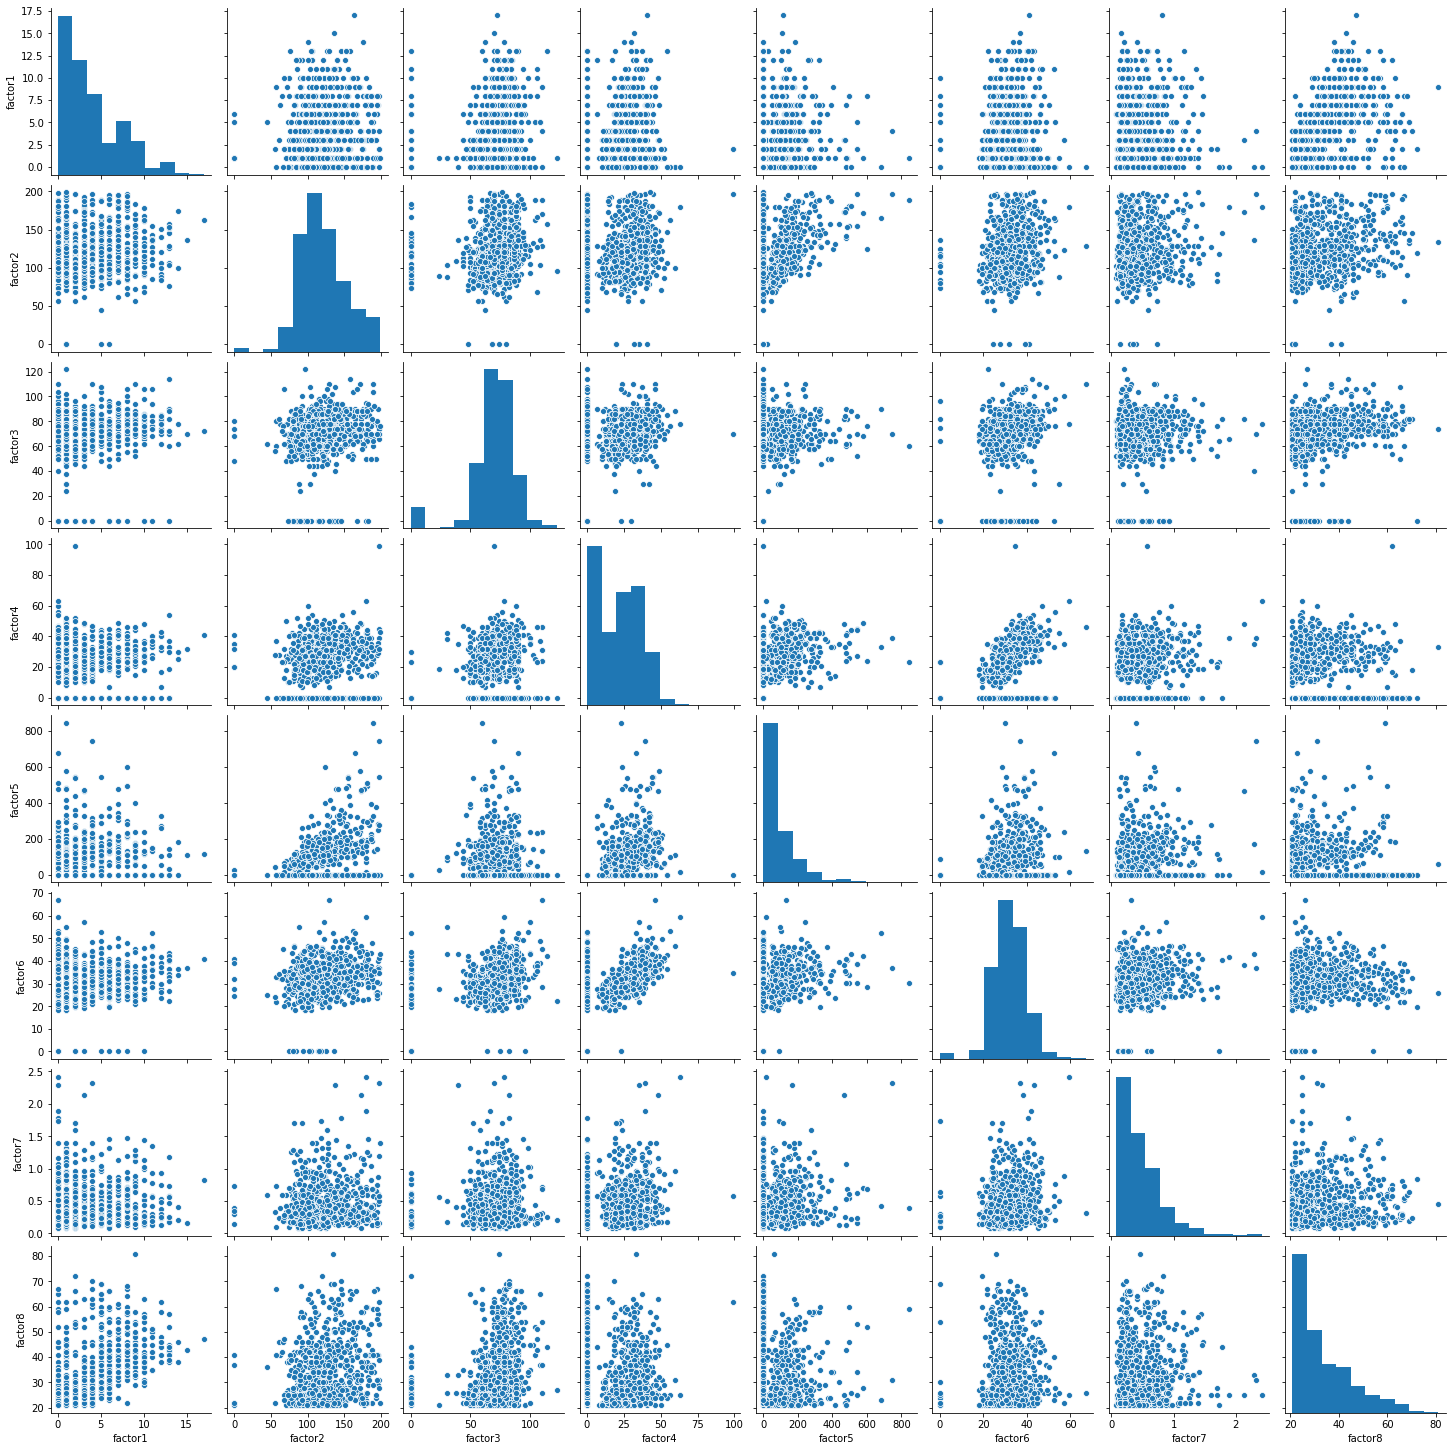

In [ ]:
import seaborn as sns
sns.pairplot(dataset[['factor1', 'factor2','factor3', 'factor4','factor5', 'factor6','factor7', 'factor8']])
plt.show()

In [ ]:
dataset.corr()

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,outcome
factor1,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
factor2,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
factor3,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
factor4,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
factor5,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
factor6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
factor7,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
factor8,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
outcome,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


# correlation among factors are generally low.  except factor 4 versus factor 5 and 6, at 0.44 and 0.39.  no need to eliminiate some of those factors. 

In [ ]:

print(dataset.skew())

factor1    0.903976
factor2    0.176412
factor3   -1.841911
factor4    0.112058
factor5    2.270630
factor6   -0.427950
factor7    1.921190
factor8    1.135165
outcome    0.638949
dtype: float64


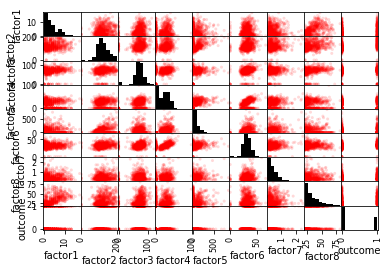

In [ ]:

pd.plotting.scatter_matrix(dataset, alpha=0.15, \
       color=(0,0,0), hist_kwds={"color":(0,0,0)}, facecolor=(1,0,0))
# show the plot.
plt.show()


those are data distribution before normalization
following are data distribution after normalization


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40822eebe0>,
      dtype=object)

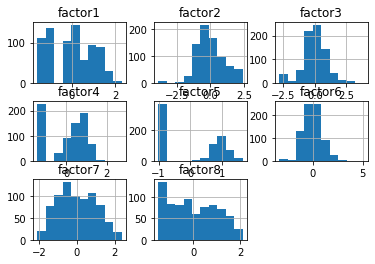

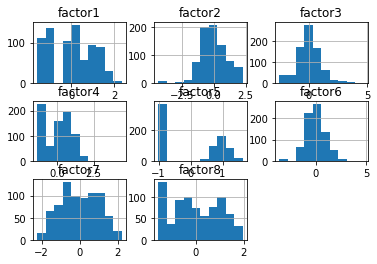

In [ ]:
from sklearn import preprocessing
all_x=['factor1', 'factor2','factor3', 'factor4','factor5', 'factor6','factor7', 'factor8']
print("those are data distribution before normalization")
dataset[all_x].hist()

pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
dataset[all_x]=pd.DataFrame(pt.fit_transform(dataset[all_x]))

print("following are data distribution after normalization")
dataset[all_x].hist()

In [ ]:
dataset.head()

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,outcome
0,-0.832401,-1.121699,-0.306049,0.633418,-1.009515,-0.724982,-0.166818,0.129159,0
1,1.189470,1.931264,-0.426720,-1.429011,-1.009515,-1.128381,0.936415,0.232926,1
2,-0.832401,-0.995331,-0.306049,0.363944,0.857912,-0.537066,-1.297872,-1.480239,0
3,-1.602920,0.507945,-1.691970,0.877548,1.075874,1.476569,2.334069,0.330131,1
4,0.592270,-0.147046,0.198415,-1.429011,-1.009515,-0.848711,-1.045615,0.018159,0


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
536/536 [==============================] - 0s 862us/step - loss: 7.2514 - accuracy: 0.5522
Epoch 2/100
536/536 [==============================] - 0s 887us/step - loss: 1.4726 - accuracy: 0.5802
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.9830 - accuracy: 0.5728
Epoch 4/100
536/536 [==============================] - 0s 915us/step - loss: 0.9377 - accuracy: 0.5858
Epoch 5/100
536/536 [==============================] - 0s 902us/step - loss: 0.9193 - accuracy: 0.6063
Epoch 6/100
536/536 [==============================] - 0s 900us/step - loss: 0.8833 - accuracy: 0.6007
Epoch 7/100
536/536 [==============================] - 0s 824us/step - loss: 0.8981 - accuracy: 0.6082
Epoch 8/100
536/536 [==============================] - 0s 855us/step - loss: 0.8968 - accuracy: 0.5951
Epoch 9/100
536/536 [==============================] - 0s 836us/step - loss: 0.7830 - accuracy: 0.6399
Epoch 10/100
536/536 [==============================] - 0s 858us/step - los

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Calculate the Confusion Matrix. and accuracy of this ANN model is

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[141  18]
 [ 38  34]]


0.7575757575757576

# Try logistic and random tree models. 

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:

RFC = RandomForestClassifier(max_depth=2, random_state=0)
RFC.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=RFC.predict(X_test)

In [ ]:
RFC.score(X_test, y_test)

0.7619047619047619

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[149  10]
 [ 45  27]]


# use logistic regression model

In [ ]:
all_x=['factor1', 'factor2','factor3', 'factor4','factor5', 'factor6','factor7', 'factor8']
X=dataset[all_x]
y=dataset.outcome

In [ ]:
from sklearn import linear_model
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
LM=linear_model.LogisticRegression(max_iter=1000)
## Fitting the model and publishing the results
result=LM.fit(X_train,y_train)


In [ ]:
pred=result.predict(X_test)
result.score(X_test,y_test)

0.7705627705627706

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(pred, y_test)
print(cm)
accuracy_score(pred, y_test)

[[137  31]
 [ 22  41]]


0.7705627705627706

In [ ]:
import numpy as np
np.mean(pred==y_test)

0.7705627705627706

#CONCLUSION

## ANN model generated confusion matrix and accuracy as follows:
[[141  18]
 [ 38  34]]
accuracy: 0.7575757575757576

##Random forest model generated following result:
*[[149  10]
 [ 45  27]]

 accuracy: 0.7619047619047619

# Logistic regression model result are:
[[137  31]
 [ 22  41]]
0.7705627705627706